In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 1 QDA
(a)

In [15]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: group the points into two arrays pts0, pts1 according to the labels
pts0 = pts[labels==0]; pts1 = pts[labels==1]
# TODO: compute the mean and standard deviations for each class (and print them)
mean0 = np.mean(pts0); std0 = np.std(pts0)
mean1 = np.mean(pts1); std1 = np.std(pts1)
print('mu0 =', f'{round(mean0, 2)}, ' ,'s0 = ', f'{round(std0, 2)}')
print('mu1 =', f'{round(mean1, 2)}, ', 's1 = ', f'{round(std1, 2)}')

mu0 = -0.71,  s0 =  1.65
mu1 = 0.54,  s1 =  1.28


(b) Assuming equal priors, $p(y=1) = p(y=0) =: p(y)$, we can calculate the posterior $p(y=1|x) = \frac{p(x|y=1) p(y)}{p(x|y=0)p(y) + p(x|y=1)p(y)} = \frac{p(x|y=1)}{p(x|y=0) + p(x|y=1)}$

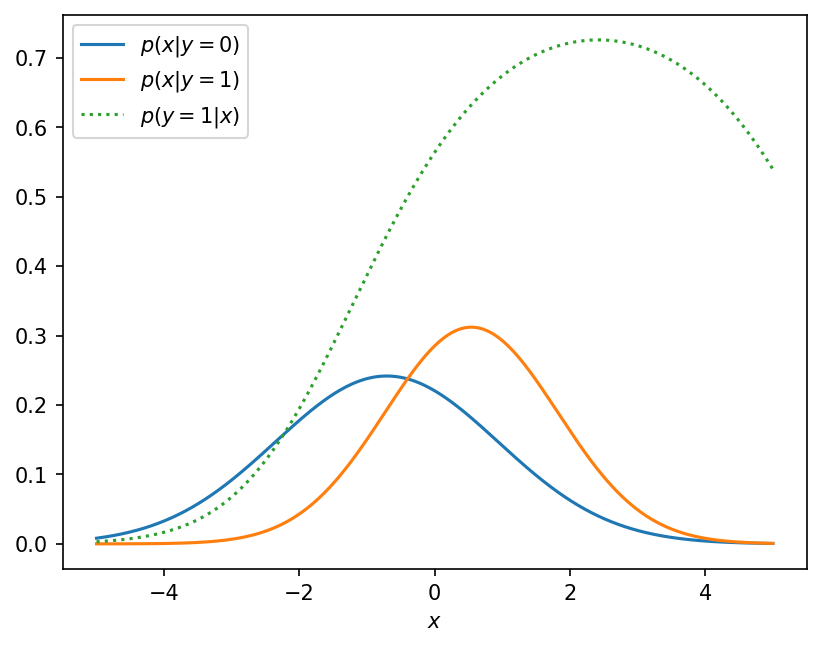

In [32]:
from scipy.stats import norm

# TODO: evaluate the Gaussian class densities in a range from -5 to 5
x = np.linspace(-5,5, 500)
norm0 = norm(loc = mean0, scale = std0); norm1 = norm(loc = mean1, scale = std1)
pdf0 = norm0.pdf(x); pdf1 = norm1.pdf(x)
# TODO: evaulate the posterior p(y=1|x)
posterior1 = pdf1/(pdf0 + pdf1)
# TODO: plot the class densities and the posterior p(y=1|x). (Don't forget title, axis labels, legend)
plt.figure(dpi=150)
plt.plot(x, pdf0, label = '$p(x|y=0)$')
plt.plot(x, pdf1, label='$p(x|y=1)$')
plt.plot(x, posterior1, label = '$p(y=1|x)$', linestyle='dotted')
plt.xlabel('$x$')
plt.legend(loc='best')

We can see that the likelihood for class 1 is greater for higher values of $x$. As we can already imagine from the formula, the posterior becomes very large when the likelihood of class 0 decreases while the likelihood for class 1 is still increasing or at least comparatively big. This makes sense when looking at the likelihoods: For greater $x$ it seems more likely that the data is described by the parameters of class 1. 

## 2 Mean of the Bernoulli distribution
The Bernoulli distribution is given as, 
$$ P(X=x) = \text{Bern}(x;\mu) = \begin{cases}
\mu, \ &\text{for} \ x = 1 \\
1- \mu, \ &\text{for} \ x = 0 
\end{cases}.$$
Therefore, the expectation value is
$$ \mathbb{E}[x] = \sum_{x=0}^1 x\, P(X=x) = 0 \cdot (1-\mu) + 1 \cdot \mu = \mu. $$

## 3 Trees and Random Forests
(a)

In [171]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: Sort the points to easily split them
pts_sorted = np.sort(pts)

In [172]:
# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate

class trees:
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y
        self.N = x.shape[0]
        self.split_no = 2

    def gen_splits(self, stop) -> list:
        indexes = np.argsort(self.x)
        x_sort = self.x[indexes]
        y_sort = self.y[indexes]
        splits = [(x_sort[:stop], y_sort[:stop]), (x_sort[stop:], y_sort[stop:])]
        return splits
    
    def gini(self, splits:list) -> float:
        impurities = np.zeros(self.split_no)
        for i, split in enumerate(splits):
            y = split[1].reshape(-1)
            y0 = y[y==0].reshape(-1) # reshape in case len = 1
            y1 = y[y==1].reshape(-1)
            p0 = y0.shape[0]/self.N
            p1 = y1.shape[0]/self.N
            impurities[i] = y.shape[0]/self.N * (p0 * (1-p0) + p1 * (1-p1)) # weight split by fraction that goes into split
        return np.sum(impurities)
    
    def entropy(self, splits:list) -> float:
        entropies = np.zeros(self.split_no)
        for i, split in enumerate(splits):
            y = split[1]
            p0 = (y[y==0].reshape(-1).shape[0])/self.N
            p1 = (y[y==1].reshape(-1).shape[0])/self.N
            entropies[i] = y.shape[0]/self.N * (-p0 * np.log(p0+10e-15) - p1 * np.log(p1+10e-15))
        return np.sum(entropies)
    
    def misclass(self, splits:list) -> float:
        misclasses = np.zeros(self.split_no)
        for i, split in enumerate(splits):
            y = split[1]
            p0 = (y[y==0].reshape(-1).shape[0])/self.N
            p1 = (y[y==1].reshape(-1).shape[0])/self.N
            misclasses[i] =  1 - max(p0, p1)
        return np.sum(misclasses)


In [118]:

# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one
    
binary_tree = trees(pts, labels)
ginis, entropies, misclasses = np.zeros((3, len(pts)))
for i in range(0, len(pts)):
    splits = binary_tree.gen_splits(i)
    ginis[i] = binary_tree.gini(splits)
    entropies[i] = binary_tree.entropy(splits)
    misclasses[i] = binary_tree.misclass(splits)

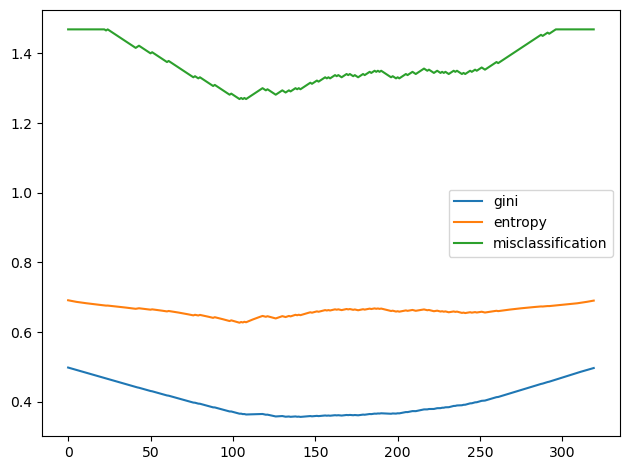

In [173]:
plt.plot(ginis, label='gini')
plt.plot(entropies, label='entropy')
plt.plot(misclasses, label='misclassification')
plt.legend(loc='best')
plt.tight_layout()

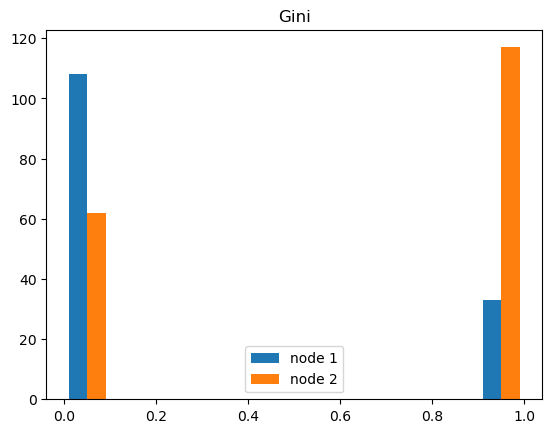

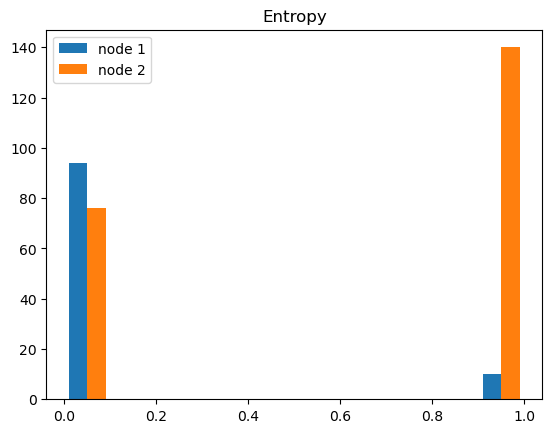

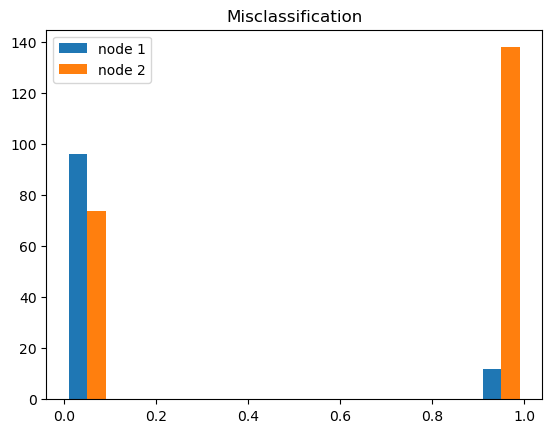

In [139]:

# TODO: Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)

for measure, name in zip([ginis, entropies, misclasses], ['Gini', 'Entropy', 'Misclassification']):
    opt = np.argmin(measure)
    opt_split = binary_tree.gen_splits(opt)
    plt.title(name)
    plt.hist([opt_split[0][1], opt_split[1][1]], label=['node 1', 'node 2'])
    plt.legend(loc='best')
    plt.show()

(b)

In [148]:
from sklearn.model_selection import train_test_split
# load the dijet data
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)
# first put test set away
X_prime, X_test, y_prime, y_test = train_test_split(features.T, labels, shuffle=True, stratify=labels, test_size=200)
# From already split data, split into train and val 
X_train, X_val, y_train, y_val = train_test_split(X_prime, y_prime, shuffle=True, stratify=y_prime, test_size=200)


In [152]:
# Hyperparameters
nos_trees = [5, 10, 20, 100]
split_crits = ['gini', 'entropy']
depths = [2, 5, 10, None]

In [156]:
from sklearn.ensemble import RandomForestClassifier

# TODO: train a random forest classifier for each combination of hyperparameters as specified on the sheet
#       and evaluate the performances on the validation set.
accuracies = {} # define a dictionary with hyperparams as keys
for no_trees in nos_trees:
    for depth in depths:
        for split_crit in split_crits: 
            RF_clf = RandomForestClassifier(n_estimators=no_trees, criterion=split_crit, max_depth=depth)
            RF_clf.fit(X_train, y_train)
            accuracies[(no_trees, depth, split_crit)] = RF_clf.score(X_val, y_val)

In [157]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set
accuracies

{(5, 2, 'gini'): 0.725,
 (5, 2, 'entropy'): 0.71,
 (5, 5, 'gini'): 0.745,
 (5, 5, 'entropy'): 0.725,
 (5, 10, 'gini'): 0.725,
 (5, 10, 'entropy'): 0.65,
 (5, None, 'gini'): 0.725,
 (5, None, 'entropy'): 0.71,
 (10, 2, 'gini'): 0.71,
 (10, 2, 'entropy'): 0.705,
 (10, 5, 'gini'): 0.75,
 (10, 5, 'entropy'): 0.755,
 (10, 10, 'gini'): 0.765,
 (10, 10, 'entropy'): 0.72,
 (10, None, 'gini'): 0.72,
 (10, None, 'entropy'): 0.755,
 (20, 2, 'gini'): 0.72,
 (20, 2, 'entropy'): 0.75,
 (20, 5, 'gini'): 0.755,
 (20, 5, 'entropy'): 0.75,
 (20, 10, 'gini'): 0.795,
 (20, 10, 'entropy'): 0.725,
 (20, None, 'gini'): 0.74,
 (20, None, 'entropy'): 0.745,
 (100, 2, 'gini'): 0.725,
 (100, 2, 'entropy'): 0.745,
 (100, 5, 'gini'): 0.755,
 (100, 5, 'entropy'): 0.745,
 (100, 10, 'gini'): 0.785,
 (100, 10, 'entropy'): 0.785,
 (100, None, 'gini'): 0.785,
 (100, None, 'entropy'): 0.785}

In [167]:
idx = np.argmin(list(accuracies.values()))
opt = list(accuracies)[idx]
opt

(5, 10, 'entropy')

In [168]:
# evaluate on test set
clf_opt = RandomForestClassifier(n_estimators = opt[0] ,criterion = opt[2], max_depth = opt[1])
clf_opt.fit(X_train, y_train)
clf_opt.score(X_test, y_test)


0.75

## 4 Beta Distribution

#### (a)
Considering a beta prior, the posterior distribution $p(\mu_x | x)$ is given by a beta distribution, 
$$ p(\mu_x | x) = \frac{\mu_x^{\alpha-1}\, (1-\mu_x)^{\beta-1}}{B(\alpha, \beta)}, $$ 
where 
$$ \frac{1}{B(\alpha, \beta)} = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) + \Gamma(\beta)}.$$
For an <b>uninformative</b> prior, several choices for $(\alpha,\beta)$ exist, e.g. $ (1,1), (0,0), (1/2, 1/2). $

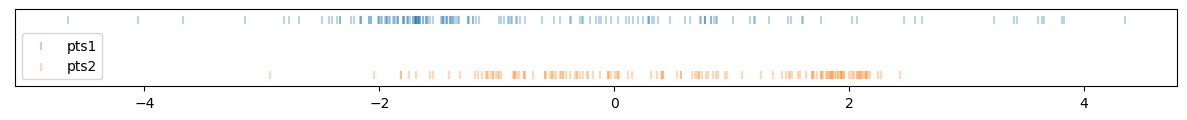

In [174]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# split the data into the classes
pts1 = pts[labels==0]
pts2 = pts[labels==1]

# plot the data
fig, ax = plt.subplots(figsize=(15, 1))
plt.scatter(pts1, np.ones_like(pts1), label='pts1', marker='|', alpha=0.3)
plt.scatter(pts2, np.zeros_like(pts2), label='pts2', marker='|', alpha=0.3)
plt.legend()
plt.yticks([])
plt.ylim(-0.2, 1.2)
plt.show()

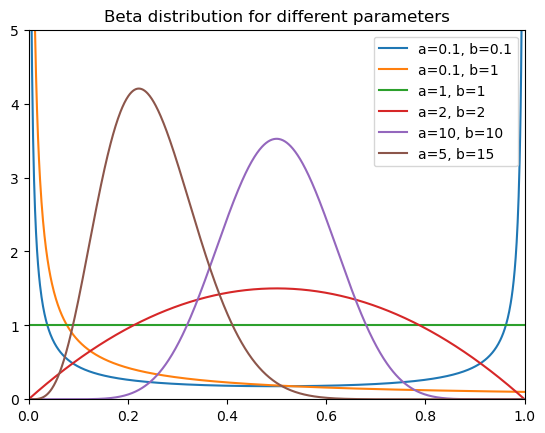

In [170]:
from scipy.special import gamma, gammaln

def beta_pdf(x, a, b):
    """Probability density function for the Beta distribution with parameters a and b. Works verctorized over all inputs"""
#     return (gamma(a+b) * x**(a-1) * (1-x)**(b-1)) / gamma(a) / gamma(b)  # breaks down for larger a, b
    return np.exp(gammaln(a+b) - gammaln(a) - gammaln(b) + np.log(x)*(a-1) + np.log(1-x)*(b-1))  # works for larger a, b

eps = 1e-6
x = np.linspace(eps, 1-eps, 1000, endpoint=True)
for a, b in ((0.1, 0.1), (0.1, 1), (1, 1), (2, 2), (10, 10), (5, 15)):
    plt.plot(x, beta_pdf(x, a, b), label=f'{a=}, {b=}')
plt.legend()
plt.ylim(0, 5)
plt.xlim(0, 1)
plt.title('Beta distribution for different parameters')
plt.show()

In [198]:

def count_points_within_distance(x, pts, r):
    """
    Count number of points among pts within a distance r of query points x (in 1D).
    
    Parameters
    ----------
    x : np.ndarray
        Query points of shape (M).
    pts : np.ndarray
        Points to be searched, shape (N).
    r : float
        radius.
        
    Returns
    -------
    np.ndarray
        Array of counts of shape (M)
        
    """
    # TODO: sort the points
    pts = np.sort(pts) 
    # TODO: use np.searchsorted on the interval boundaries 
    #       to find number of points inside each interval (don't use loops!)
    counts = np.searchsorted(pts, x+r) - np.searchsorted(pts, x-r) 
    return counts

# use a flat prior
prior_a, prior_b = 1, 1  

# define value range
vmin, vmax = -5, 5

# set the radius
r = .3

# TODO: sample x and mu as described in the exercise
xs = np.linspace(vmin, vmax, num=1000)
mus = np.linspace(0,1, num=100)
# TODO: use count_points_within_distance to calculate the counts
total_counts = count_points_within_distance(xs, pts, r)
# TODO (optional): plot the counts vs x

# TODO: evaluate the posterior to get an image (use broadcasting, no loops needed!)
n1 = len(pts1); n2 = len(pts2)
beta_pdf(mus, prior_a + n1, prior_b + n2)
# TODO: plot the posterior as an image, specify the correct origin and extent


/var/folders/hw/19lr0sdd3gs7l_vcxrqh9drm0000gn/T/ipykernel_5298/1618246883.py:6: RuntimeWarning: divide by zero encountered in log
  return np.exp(gammaln(a+b) - gammaln(a) - gammaln(b) + np.log(x)*(a-1) + np.log(1-x)*(b-1))  # works for larger a, b


array([0.00000000e+000, 1.97249351e-243, 6.33816634e-193, 1.15452273e-163,
       4.16719236e-143, 2.54204367e-127, 1.47658713e-114, 7.01366686e-104,
       9.83129814e-095, 9.30480444e-087, 1.04617714e-079, 2.09055467e-073,
       9.99548681e-068, 1.43298554e-062, 7.34022127e-058, 1.54351615e-053,
       1.49009905e-049, 7.23600272e-046, 1.90626349e-042, 2.90211381e-039,
       2.69319120e-036, 1.59431722e-033, 6.25991945e-031, 1.68606842e-028,
       3.20778188e-026, 4.42245745e-024, 4.51858444e-022, 3.48994515e-020,
       2.07358511e-018, 9.62653235e-017, 3.54063487e-015, 1.04454965e-013,
       2.49931473e-012, 4.89851385e-011, 7.93457415e-010, 1.07070016e-008,
       1.21230467e-007, 1.15917964e-006, 9.41436227e-006, 6.52792238e-005,
       3.88243776e-004, 1.98865253e-003, 8.80464699e-003, 3.38022593e-002,
       1.12839891e-001, 3.28318644e-001, 8.34288113e-001, 1.85456314e+000,
       3.61111233e+000, 6.16507671e+000, 9.23457624e+000, 1.21400304e+001,
       1.40072003e+001, 1

(e) Bonus